In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Logistic Regression - MNIST data
### Between class 1 and 7

In [8]:
# 28 x 28 images
# Each row is a training example, label represents the number in the image
# The remaining row contains 784(28x28) pixels of the image
df = pd.read_csv('mnist_train.csv')

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# We'll select 2 numbers, 1 and 7 for classification.
# The () below are essential. Gives error w/o them.
data = df[(df["label"] == 1) | (df["label"] == 7)]
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41980,7,0,0,0,0,0,0,0,0,0,...,27,253,110,0,0,0,0,0,0,0
41983,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting and Displaying single image from the data frame

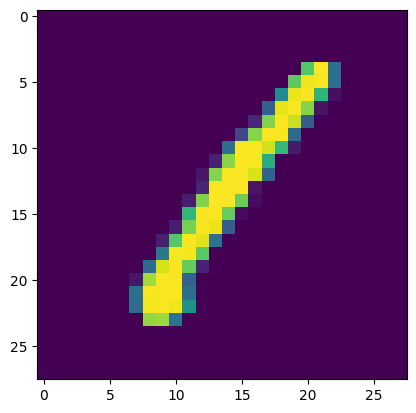

In [80]:
# Showing image

# Selecting 0th row, can't do data[0]
img = data[0:1]

# Dataframe to numpy array
img = np.array(img)

# Array of form [[]], thus selecting 0th element
img = img[0]

# Excluding label of the image
img = img[1:]

# Reshaping in order to be displayed as image
img = img.reshape((28, 28))

# Displaying image using matplotlib
plt.imshow(img)

### Training model

In [119]:
totalData = np.array(data)
trueLabels = totalData[:, 0]
trueLabels[trueLabels == 7] = 0

trainLabels = trueLabels[:100];
testLabels = trueLabels[100:150]

trainData = totalData[:100,1:]
testData = totalData[100:150, 1:]

In [120]:
x = trainData;
y = trainLabels;

In [121]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [122]:
def hypoFunLogR(thetas, example):
    y_pred = np.dot(example, thetas);
    return y_pred[0];

In [123]:
def hypoLogR(thetas, example):
    return sigmoid(hypoFunLogR(thetas, example));

In [124]:
def lossFunLogR(x, y, thetas):
    loss = 0;
    # Traversing over all training examples to calculate total loss
    for i in range(x.shape[0]):
        
        # Selecting ith training example
        example = x[i];
        
        # prediction for ith training example
        y_pred = hypoLogR(thetas, example);
        
        epsilon = 1e-5
        # Adding loss for 1 training example to the total loss
        loss += (y[i]*np.log(y_pred + epsilon) + (1 - y[i])*np.log(1 - y_pred + epsilon));
        
    return -loss/x.shape[0];

In [125]:
def calcdJLogReg(thetas, x, y):
    DJ = np.zeros((thetas.shape[0], 1))
    for j in range(x.shape[1]):
        sum1 = 0;
        for i in range(x.shape[0]):
            example = x[i];
            # prediction for ith training example
            y_pred = hypoLogR(thetas, example);
            sum1 += (- y[i] + y_pred)*x[i][j];
        DJ[j, :] = sum1;
    return DJ/x.shape[0];

In [126]:
# Running Gradient Descent
loss = [];
thetas = np.zeros(x.shape[1]).reshape(x.shape[1], 1);
for i in range(100):
    DJ = calcdJLogReg(thetas, x, y);
    thetas = thetas - 0.01*DJ;
    loss.append(lossFunLogR(x, y, thetas));

/var/folders/sp/p58zvn2x0j74k4wxmrwnyh7h0000gn/T/ipykernel_6993/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


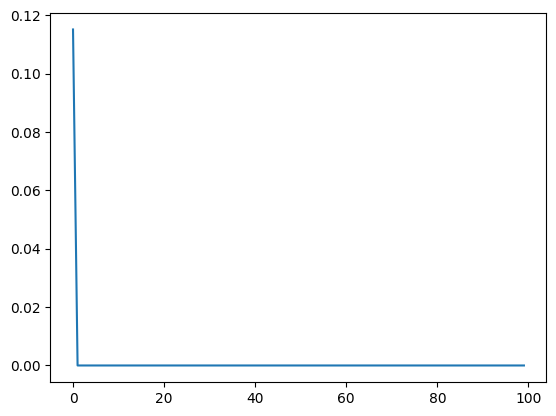

In [127]:
plt.plot(loss)

### Accuracy

In [138]:
correctCount = 0;
for i in range(testLabels.shape[0]):
    labelPred = 0 if (hypoLogR(thetas, testData[i]) < 0.5) else 1;
    if(labelPred == testLabels[i]) :
        correctCount+=1;

print(f"accuracy:- {correctCount/testLabels.shape[0]})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1199807968.py, line 7)